# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [ ]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [ ]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


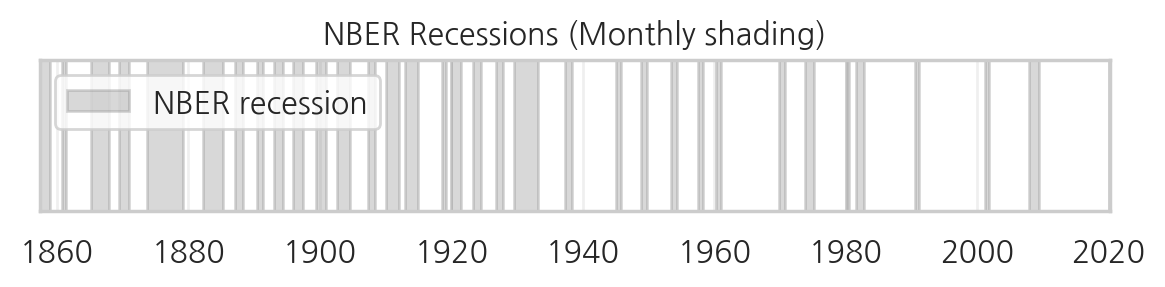

In [ ]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## **내용**
- 관련 기사 및 읽을거리
- 사전준비
- define a function that displays NBER recession periods
-

## 관련 기사 및 읽을거리

-

## 사전준비

1. Google colab matplotlib에서 한글 폰트 깨지는 문제 해결: 아래 (1), (2) 중 하나를 실행

  (1) koreanize_matplotlib 라이브러리 사용: 간편하나 안 될 경우 (2)를 사용
  
  (2) 폰트 다운하고 재실행

2. 구글 드라이브 mount

In [ ]:
# (1) koreanize_matplotlib 라이브러리 사용
!pip install koreanize_matplotlib
import koreanize_matplotlib

In [ ]:
'''
# (2) Google Colab matplotlib 한글 폰트 깨지는 문제 해결

#1. 이 셀을 실행
#2. 좌측 상단 메뉴에서 Runtime -> Restart session
#3. 노트북 파일을 처음부터 다시 실행

#* 그림에 한글이 들어갈 경우에만 필요한 작업임


# 1. 나눔 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n# (2) Google Colab matplotlib 한글 폰트 깨지는 문제 해결\n\n#1. 이 셀을 실행\n#2. 좌측 상단 메뉴에서 Runtime -> Restart session\n#3. 노트북 파일을 처음부터 다시 실행\n\n#* 그림에 한글이 들어갈 경우에만 필요한 작업임\n\n\n# 1. 나눔 폰트 다운\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [ ]:
'''
# matplotlib의 폰트를 Nanum 폰트로 지정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
'''

"\n# matplotlib의 폰트를 Nanum 폰트로 지정\nimport matplotlib.pyplot as plt\nplt.rc('font', family='NanumBarunGothic')\n"

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os
import pandas_datareader as pdr
from datetime import date

import scipy.optimize as solver
from functools import reduce

#sns.set_style('whitegrid')
#sns.set_style('darkgrid')
#sns.set_theme()

#sns.set(rc={'figure.figsize':(6,4)})

# for Korean fonts
plt.rcParams['axes.unicode_minus'] = False

# for preferred display
%config InlineBackend.figure_format = 'retina'   # for retina display in Mac
np.set_printoptions(precision=3, suppress=True)  # for pretty display of numpy arrays
pd.options.display.float_format = '{:,.3f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 10

In [ ]:
# to plot pretty figures
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'b'
#plt.rcParams['axes.grid'] = True

mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('font', size=12)
plt.rc('legend', fontsize=12)

# Where to save the figures: google drive를 연동해야 함
DIR = "/content/drive/MyDrive/Colab Notebooks/Textbook_FinancialEconomics/figures/"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=600)

In [ ]:
# install pandas-datareader in your system
!pip3 install pandas-datareader

## 우리나라의 본원통화, 광의의 화폐

ECOS 통계 코드 검색: https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch

In [ ]:
#!pip install pandas_datareader
!pip install PublicDataReader --upgrade

In [ ]:
from PublicDataReader import Ecos

In [ ]:
# API key를 이용해서 ecos에서 데이터를 가져 옴
#!pip install pandas_datareader
from PublicDataReader import Ecos

service_key = "X86F3N6MT6RRYXJ35P87"
api = Ecos(service_key)
df = api.get_statistic_table_list()
df.head()

,상위통계표코드,통계표코드,통계명,시점,검색가능여부,출처
0,*,0000000001,1. 통화/금융,None,N,None
1,0000000001,0000000002,1.1. 통화/유동성,None,N,None
2,0000000002,0000000003,1.1.1. 본원통화,None,N,None
3,0000000003,0000000004,1.1.1.1. 본원통화 구성내역,None,N,None
4,0000000004,102Y004,"1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)",M,Y,None


In [ ]:
df.head(20)

,상위통계표코드,통계표코드,통계명,시점,검색가능여부,출처
0,*,0000000001,1. 통화/금융,None,N,None
1,0000000001,0000000002,1.1. 통화/유동성,None,N,None
2,0000000002,0000000003,1.1.1. 본원통화,None,N,None
3,0000000003,0000000004,1.1.1.1. 본원통화 구성내역,None,N,None
4,0000000004,102Y004,"1.1.1.1.1. 본원통화 구성내역(평잔, 계절조정계열)",M,Y,None
5,0000000004,102Y002,"1.1.1.1.2. 본원통화 구성내역(평잔, 원계열)",M,Y,None
6,0000000004,102Y003,"1.1.1.1.3. 본원통화 구성내역(말잔, 계절조정계열)",M,Y,None
7,0000000004,102Y001,"1.1.1.1.4. 본원통화 구성내역(말잔, 원계열)",M,Y,한국은행
8,0000000002,0000000005,1.1.2. M1(협의통화),None,N,None
9,0000000005,0000000006,1.1.2.1. M1(협의통화) 상품별 구성내역,None,N,None


In [ ]:
# ECOS 결과를 dataframe으로 전환하는 함수
def ECOS_to_df(df_input, frequency):
  """
  function that converts output from ECOS into a DataFrame
  frequency: "%Y", "%Y-%m", "%Y-%m-%d"
  """
  df_input = df_input.loc[:,['통계항목명1','값','시점']]
  df_input.rename(columns={'값':df_input['통계항목명1'][1], '시점':'date'}, inplace=True)
  df_output = df_input.iloc[:,1:]

  df_output.set_index('date', inplace=True)
  df_output.index = pd.to_datetime(df_output.index, format=frequency)

  return df_output

In [ ]:
date_start = "2011"
date_end = "2024"
freq = "A"

cash = api.get_statistic_search(통계표코드="102Y004", 통계항목코드1="ABA104", 주기=freq, 검색시작일자=date_start, 검색종료일자=date_end)
cash = ECOS_to_df(cash, "%Y")

reserve = api.get_statistic_search(통계표코드="102Y004", 통계항목코드1="ABA103", 주기=freq, 검색시작일자=date_start, 검색종료일자=date_end)
reserve = ECOS_to_df(reserve, "%Y")

M2 = api.get_statistic_search(통계표코드="101Y003", 통계항목코드1="BBHS00", 주기=freq, 검색시작일자=date_start, 검색종료일자=date_end)
M2 = ECOS_to_df(M2, "%Y")

#cash_M2 = api.get_statistic_search(통계표코드="101Y003", 통계항목코드1="BBHS01", 주기=freq, 검색시작일자=date_start, 검색종료일자=date_end)
#cash_M2 = ECOS_to_df(cash_M2, "%Y")

df = pd.concat([cash, reserve, M2], axis=1).astype(float)
df['예금'] = df['M2(평잔, 계절조정계열)']- df['현금통화']
df.head(3)

,현금통화,중앙은행 대 예금취급기관부채,"M2(평잔, 계절조정계열)",예금
date,,,,
2011-01-01,"36,550.100","38,681.900","1,708,984.500","1,672,434.400"
2012-01-01,"41,396.400","40,734.700","1,798,625.700","1,757,229.300"
2013-01-01,"48,758.200","42,621.200","1,885,781.300","1,837,023.100"


In [ ]:
# 2024년 기준
yr = "2023"
data_yr = df.loc[yr]
data_yr.columns = ['현금통화','지불준비금','M2','예금']
data_yr = data_yr.div(1000)
data_yr

,현금통화,지불준비금,M2,예금
date,,,,
2023-01-01,170.225,92.156,"3,830.620","3,660.395"


Saving figure cash_reserve_deposits


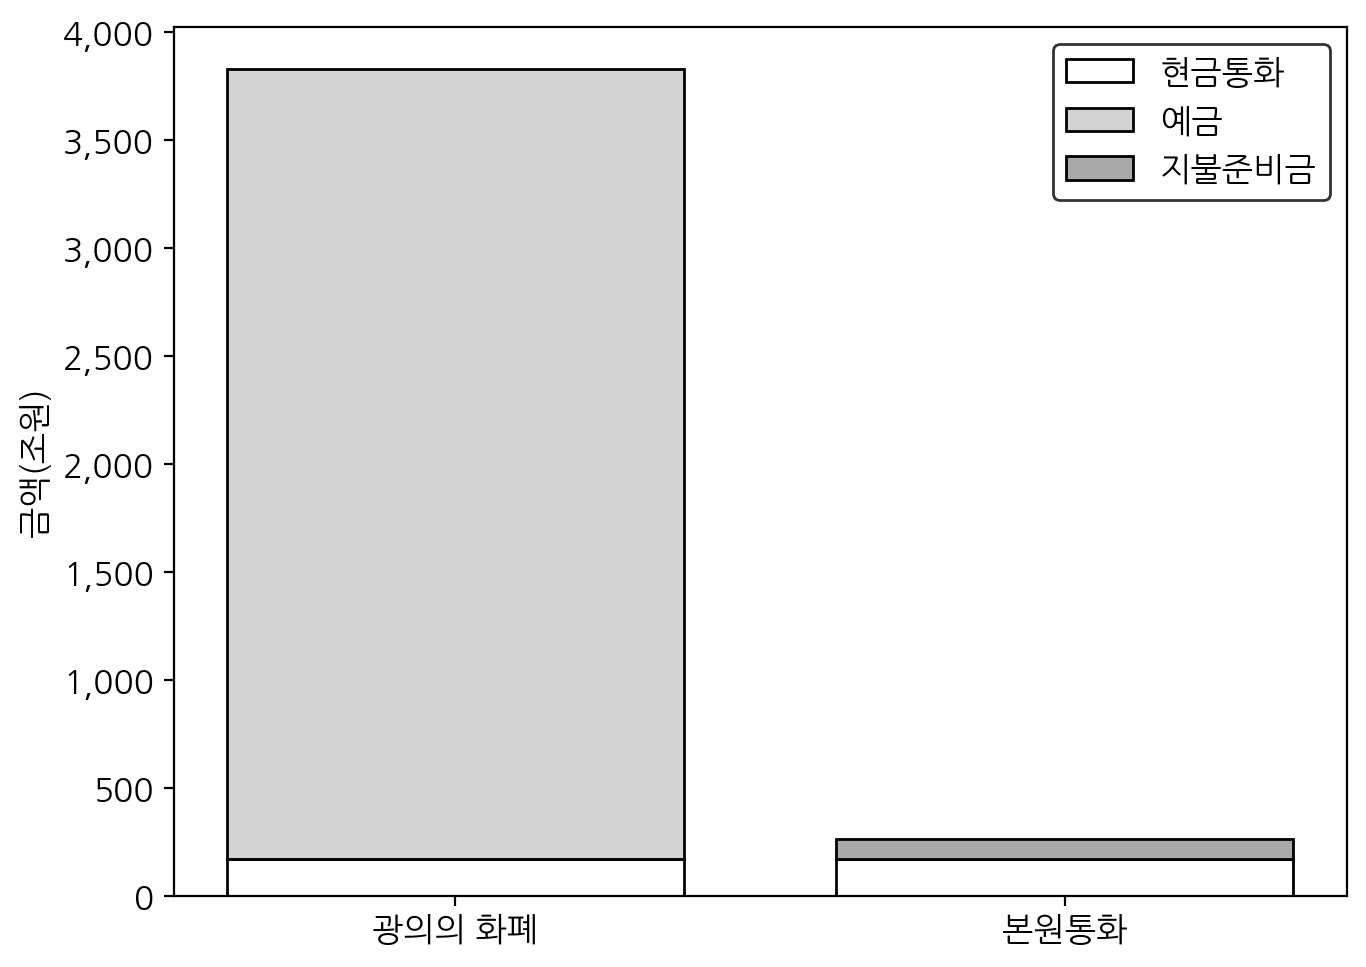

In [ ]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(7, 5))

# Data for plotting using iloc
categories = ['광의의 화폐', '본원통화']
x_pos = [0, 0.2]

# Access data using iloc - Switch the order of the data
cash = [data_yr.iloc[0]['현금통화'], data_yr.iloc[0]['현금통화']]
reserves = [0, data_yr.iloc[0]['지불준비금']]  # Now second bar
deposits = [data_yr.iloc[0]['예금'], 0]  # Now first bar

# Bar width
width = 0.15

# Create stacked bars with black and white theme
bars1 = ax.bar(x_pos, cash, width, label='현금통화',
               color='white', edgecolor='black')
bars2 = ax.bar(x_pos, deposits, width, bottom=cash, label='예금',
               color='lightgray', edgecolor='black')
bars3 = ax.bar(x_pos, reserves, width, bottom=cash, label='지불준비금',
               color='darkgray', edgecolor='black')

# Customize the plot
ax.set_ylabel('금액(조원)')

# Set custom x-axis ticks and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(categories)

# Format y-axis to show three digits with commas
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

# Add legend with black and white theme
ax.legend(loc='best', facecolor='white', edgecolor='black')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Adjust layout to prevent label cutoff while keeping it compact
plt.tight_layout()
save_fig('cash_reserve_deposits')

plt.show()


## NBER recession date

In [ ]:
def load_and_process_nber_data(url):
    """
    Load and process NBER recession data from Excel file.

    Parameters:
    url (str): URL or path to NBER Excel file

    Returns:
    tuple: (monthly_data, quarterly_data)
    """
    # Read and select recession period data
    NBER = pd.read_excel(url)
    NBER = NBER.iloc[4:37, 2:4]
    NBER.rename(columns={'Unnamed: 2': 'peak', 'Unnamed: 3': 'trough'}, inplace=True)

    # Process dates
    NBERq = NBER.copy()

    # Extract quarterly dates
    for col in ['peak', 'trough']:
        NBERq[f'{col}q'] = pd.to_datetime(
            NBERq[col].str.extract('\((.*?)\)', expand=True)[0]
        )

        # Create monthly dates
        year = NBERq[col].str[-13:-9]
        month = pd.to_datetime(NBERq[col].str[:-14], format='%B').dt.month
        NBERq[f'{col}_mdate'] = pd.to_datetime(
            dict(year=year, month=month, day=1)
        )

    # Create monthly dataframe
    NBERm = NBERq.loc[:, ['peak_mdate', 'trough_mdate']]
    NBERm.columns = ['peak', 'trough']
    NBERm['year'] = NBERm['peak'].dt.year.astype('int')
    NBERm.set_index('year', inplace=True)

    # Create quarterly dataframe
    NBERq_final = NBERq.loc[:, ['peakq', 'troughq']]
    NBERq_final.columns = ['peak', 'trough']
    NBERq_final['year'] = NBERq_final['peak'].dt.year.astype('int')
    NBERq_final.set_index('year', inplace=True)

    return NBERm, NBERq_final

def plot_nber_recession(start_year, end_year, nber_data, freq='monthly'):
    """
    Plot NBER recession periods.

    Parameters:
    start_year (int): Starting year
    end_year (int): Ending year
    nber_data (pd.DataFrame): DataFrame containing recession dates
    freq (str): 'monthly' or 'quarterly'
    """
    data_subset = nber_data.loc[start_year:end_year]

    for ind in data_subset.index:
        plt.axvspan(
            data_subset['peak'][ind],
            data_subset['trough'][ind],
            alpha=0.3,
            color='gray',
            label='NBER Recession' if ind == data_subset.index[0] else ""
        )

# Example usage:
url = 'https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx'
NBERm, NBERq = load_and_process_nber_data(url)

<>:22: SyntaxWarning: invalid escape sequence '\('
<>:22: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-1874943588.py:22: SyntaxWarning: invalid escape sequence '\('
  NBERq[col].str.extract('\((.*?)\)', expand=True)[0]
/tmp/ipython-input-1874943588.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NBERq[f'{col}q'] = pd.to_datetime(
/tmp/ipython-input-1874943588.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NBERq[f'{col}q'] = pd.to_datetime(


## 연준 총자산, 예금수취기관 초과지준

In [ ]:
# EXCSRESNW: exess reserve of depository institutions
# WALCL: total assets, all Fed

var_list = ['EXCSRESNW', 'WALCL']
start = date(2003,1,1)
end = date(2020,12,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
print(df.head())
print(df.tail(3))

print(df.info())

            EXCSRESNW   WALCL
DATE                         
2003-01-01  1,640.000  730994
2003-01-08  1,640.000  723762
2003-01-15  1,829.000  720074
2003-01-22  1,829.000  735953
2003-01-29  1,580.000  712809
            EXCSRESNW    WALCL
DATE                          
2020-12-16        NaN  7362592
2020-12-23        NaN  7404039
2020-12-30        NaN  7363351
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 940 entries, 2003-01-01 to 2020-12-30
Freq: W-WED
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EXCSRESNW  924 non-null    float64
 1   WALCL      940 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 22.0 KB
None


In [ ]:
# make it billion dollars
df = df.div(1000)

Saving figure excessreserve_totalasset


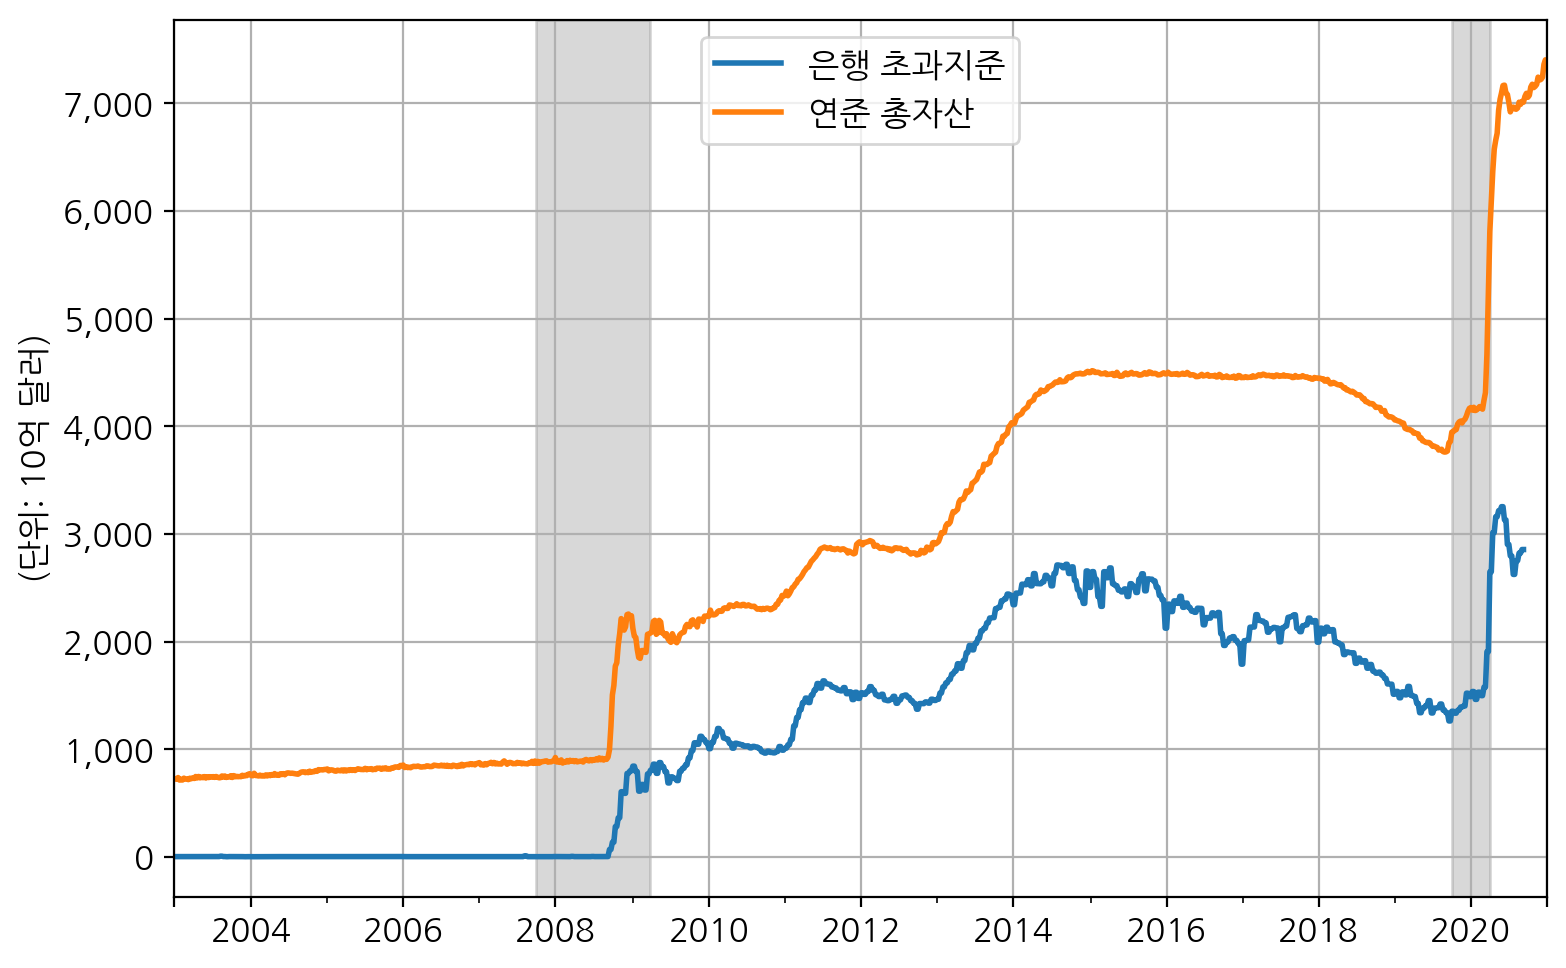

In [ ]:
ax = df.plot()
plt.legend(labels=['은행 초과지준','연준 총자산'], fontsize=12, loc=9)
plt.xlabel('')
plt.ylabel('(단위: 10억 달러)')
# Plot recessions (example)
plot_nber_recession(2001, 2020, NBERq, freq='quarterly')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()

save_fig('excessreserve_totalasset')

## 대공황 시기 현금통화비율, 초과지준비율, M1, 본원통화

In [ ]:
# Create date range
dates = pd.date_range(start='1929-01-01', end='1933-12-31', freq='M')

# Create the data dictionary
data = pd.DataFrame({
    'Date': dates.strftime('%Y-%m'),
    'Currency_Ratio': [
        # 1929
        0.180, 0.178, 0.182, 0.180, 0.175, 0.178, 0.180, 0.182, 0.178, 0.175, 0.178, 0.180,
        # 1930
        0.175, 0.170, 0.172, 0.168, 0.170, 0.172, 0.175, 0.173, 0.175, 0.177, 0.175, 0.178,
        # 1931
        0.180, 0.185, 0.190, 0.195, 0.200, 0.210, 0.220, 0.230, 0.240, 0.250, 0.260, 0.280,
        # 1932
        0.290, 0.295, 0.300, 0.310, 0.320, 0.325, 0.330, 0.320, 0.325, 0.330, 0.340, 0.350,
        # 1933
        0.370, 0.385, 0.390, 0.350, 0.340, 0.330, 0.320, 0.315, 0.310, 0.315, 0.320, 0.315
    ],
    'Excess_Reserves': [
        # 1929
        0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
        # 1930
        0.001, 0.001, 0.002, 0.001, 0.001, 0.002, 0.001, 0.001, 0.002, 0.001, 0.001, 0.002,
        # 1931
        0.002, 0.003, 0.003, 0.004, 0.004, 0.005, 0.006, 0.007, 0.008, 0.010, 0.012, 0.015,
        # 1932
        0.018, 0.020, 0.025, 0.028, 0.030, 0.032, 0.035, 0.033, 0.035, 0.037, 0.038, 0.040,
        # 1933
        0.042, 0.045, 0.052, 0.025, 0.022, 0.020, 0.045, 0.048, 0.050, 0.052, 0.051, 0.050
    ],
    'Money_Supply': [
        # 1929
        26.2, 26.1, 26.3, 26.2, 26.0, 26.2, 26.3, 26.1, 26.2, 26.1, 26.0, 26.2,
        # 1930
        26.3, 26.5, 27.8, 25.5, 26.2, 25.8, 25.7, 25.5, 25.3, 25.2, 25.0, 24.8,
        # 1931
        24.7, 24.5, 24.8, 24.5, 24.3, 24.2, 23.8, 23.5, 23.2, 22.8, 22.5, 22.0,
        # 1932
        21.5, 21.2, 21.0, 20.8, 20.5, 20.2, 20.0, 19.8, 19.5, 19.3, 19.2, 19.0,
        # 1933
        18.8, 18.5, 18.8, 19.0, 18.8, 18.5, 19.0, 19.2, 19.0, 18.8, 19.0, 18.8
    ],
    'Monetary_Base': [
        # 1929
        7.1, 7.0, 7.1, 7.0, 6.9, 7.0, 6.9, 7.0, 6.9, 6.8, 6.9, 7.0,
        # 1930
        6.9, 6.8, 6.9, 6.8, 6.7, 6.8, 6.9, 6.8, 6.9, 6.8, 6.9, 6.8,
        # 1931
        6.8, 6.9, 7.0, 6.9, 6.8, 6.9, 7.0, 7.1, 7.0, 7.1, 7.2, 7.3,
        # 1932
        7.2, 7.3, 7.2, 7.3, 7.4, 7.3, 7.4, 7.5, 7.4, 7.5, 7.6, 7.7,
        # 1933
        7.8, 7.9, 8.0, 7.2, 7.1, 7.3, 7.4, 7.3, 7.4, 7.3, 7.4, 7.3
    ]
})


# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

data.head(3)

/tmp/ipython-input-4172386983.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1929-01-01', end='1933-12-31', freq='M')


,Date,Currency_Ratio,Excess_Reserves,Money_Supply,Monetary_Base
0,1929-01-01,0.180,0.001,26.200,7.100
1,1929-02-01,0.178,0.001,26.100,7.000
2,1929-03-01,0.182,0.001,26.300,7.100


Saving figure cr_er


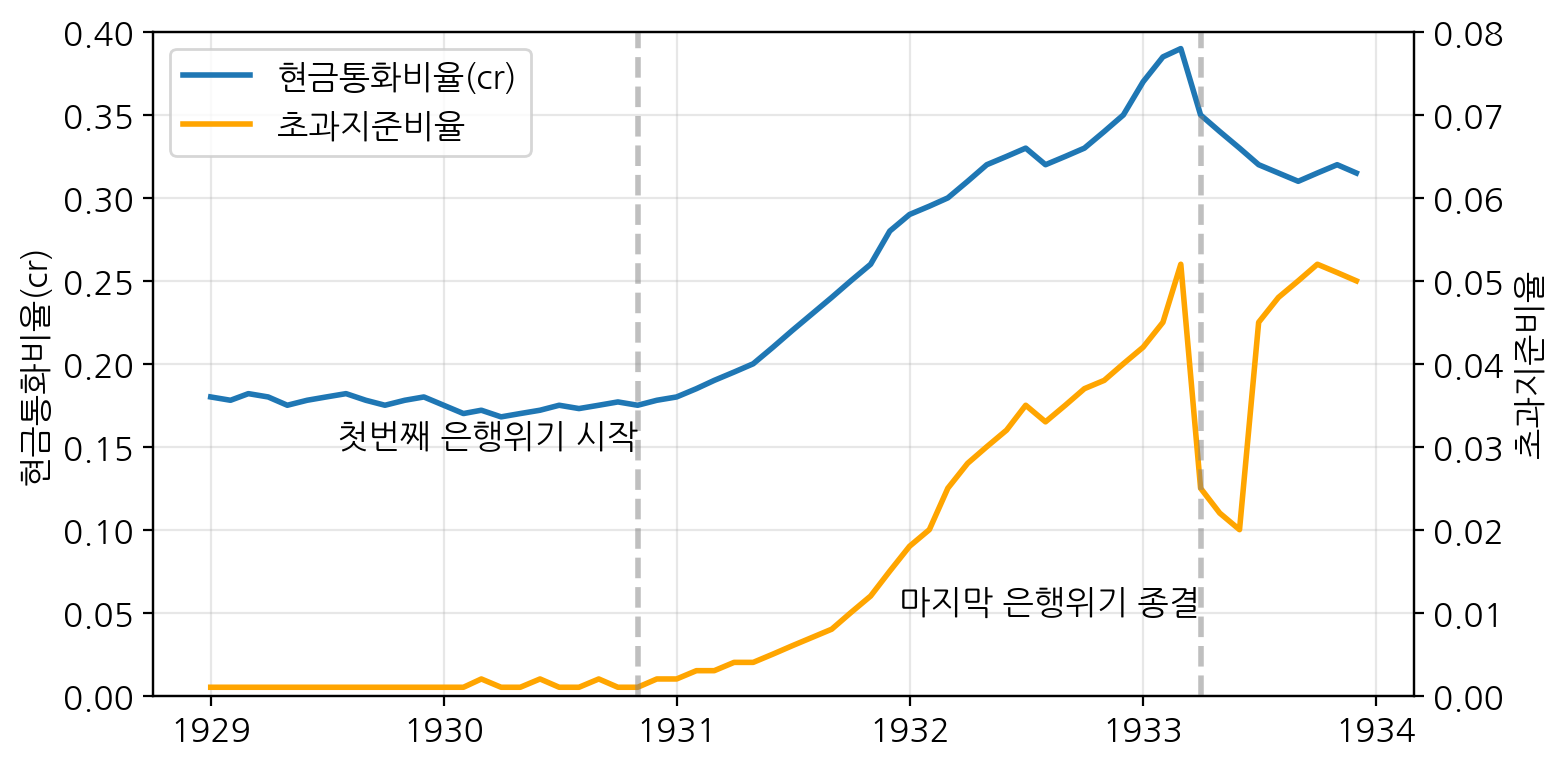

In [ ]:
# Create the figure and axis
plt.figure(figsize=(8, 4))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot Currency Ratio on left axis
line1 = ax1.plot(data['Date'], data['Currency_Ratio'], label='현금통화비율(cr)')
ax1.set_ylabel('현금통화비율(cr)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 0.40)
ax1.grid(True, alpha=0.3)

# Plot Excess Reserves on right axis
line2 = ax2.plot(data['Date'], data['Excess_Reserves'], label='초과지준비율', color='orange')
ax2.set_ylabel('초과지준비율')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 0.08)

# Add crisis markers
crisis_start = pd.Timestamp('1930-11-01')
crisis_end = pd.Timestamp('1933-04-01')
plt.axvline(x=crisis_start, color='grey', linestyle='--', alpha=0.5)
plt.axvline(x=crisis_end, color='grey', linestyle='--', alpha=0.5)

# Add annotations
plt.text(crisis_start, 0.03, '첫번째 은행위기 시작',
         horizontalalignment='right')
plt.text(crisis_end, 0.01, '마지막 은행위기 종결',
         horizontalalignment='right')

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

save_fig('cr_er')
plt.show()

Saving figure M1_base


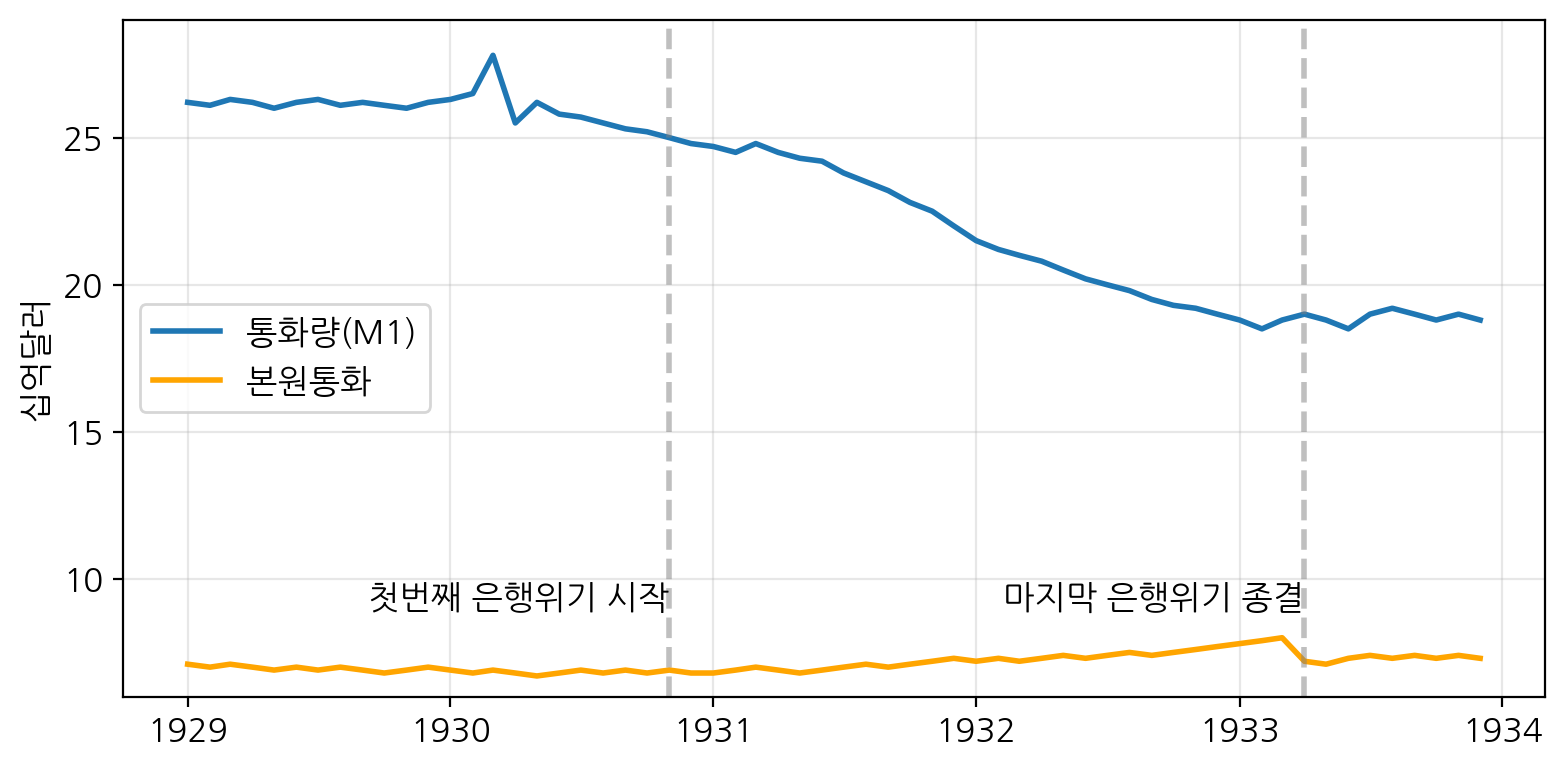

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# Plot the data
line1 = ax.plot(data['Date'], data['Money_Supply'],  label='통화량(M1)')
line2 = ax.plot(data['Date'], data['Monetary_Base'], label='본원통화', color='orange')

# Add crisis markers
crisis_start = pd.Timestamp('1930-11-01')
crisis_end = pd.Timestamp('1933-04-01')
plt.axvline(x=crisis_start, color='grey', linestyle='--', alpha=0.5)
plt.axvline(x=crisis_end, color='grey', linestyle='--', alpha=0.5)

# Add annotations
plt.text(crisis_start, 9, '첫번째 은행위기 시작',
         horizontalalignment='right')
plt.text(crisis_end, 9, '마지막 은행위기 종결',
         horizontalalignment='right')

# Customize the plot
plt.ylabel('십억달러')
plt.grid(True, alpha=0.3)
plt.legend()

# Set y-axis limits
plt.ylim(6, 29)

save_fig('M1_base')
plt.show()

## GFC 시기 현금통화비율, 초과지준비율, M1, 본원통화

In [ ]:
var_list = ['EXCRESNS', 'CURRCIR', 'TCDNS','BOGMBASE','M1SL','M2SL']
start = date(2001,1,1)
end = date(2024,12,1)

df_gfc = pdr.get_data_fred(var_list, start=start, end=end)
print(df_gfc.head())

            EXCRESNS  CURRCIR   TCDNS  BOGMBASE      M1SL      M2SL
DATE                                                               
2001-01-01     1.264  585.106 559.600   598.700 1,096.700 4,978.300
2001-02-01     1.345  582.524 545.300   595.900 1,101.200 5,017.000
2001-03-01     1.251  585.082 563.500   599.100 1,108.900 5,074.800
2001-04-01     1.258  587.928 575.900   601.700 1,116.700 5,139.100
2001-05-01     1.019  590.873 560.700   605.900 1,118.500 5,137.200


In [ ]:
df_gfc['currency ratio'] = df_gfc['CURRCIR'].div(df_gfc['TCDNS'])
df_gfc['excess reserve ratio'] = df_gfc['EXCRESNS'].div(df_gfc['TCDNS'])

In [ ]:
df_gfc.loc['2008',:]

,EXCRESNS,CURRCIR,TCDNS,BOGMBASE,M1SL,M2SL,currency ratio,excess reserve ratio
DATE,,,,,,,,
2008-01-01,1.648,817.367,614.000,830.600,"1,377.700","7,517.500",1.331,0.003
2008-02-01,1.615,814.429,600.900,829.500,"1,380.400","7,604.000",1.355,0.003
2008-03-01,2.645,816.644,632.900,833.000,"1,388.700","7,670.000",1.290,0.004
2008-04-01,1.737,813.937,640.600,830.200,"1,391.400","7,712.500",1.271,0.003
2008-05-01,1.838,817.686,626.300,834.700,"1,393.400","7,725.200",1.306,0.003
2008-06-01,2.225,822.827,632.200,840.200,"1,404.600","7,743.900",1.302,0.004
2008-07-01,1.913,829.946,636.700,847.000,"1,421.100","7,791.200",1.304,0.003
2008-08-01,1.875,830.514,619.900,847.600,"1,407.400","7,805.800",1.340,0.003
2008-09-01,59.482,833.942,658.800,909.700,"1,462.000","7,872.400",1.266,0.090


Saving figure cr_er_GFC


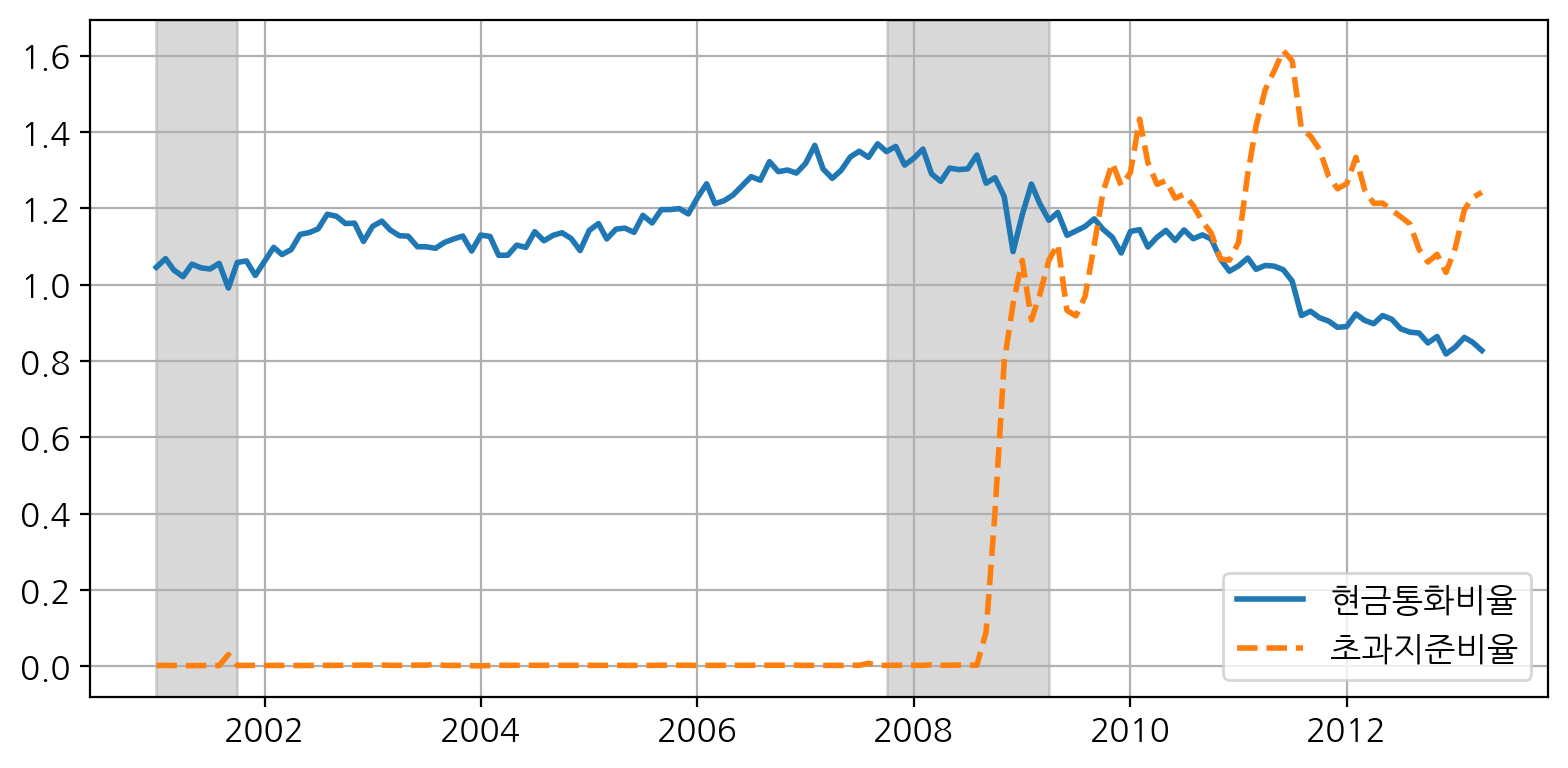

In [ ]:
# GFC 당시 현금통화비율과 초과지준비율
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df_gfc.loc['2001':'2013-04', 'currency ratio'],
        label='현금통화비율', linewidth=2)

ax.plot(df_gfc.loc['2001':'2013-04', 'excess reserve ratio'],
        label='초과지준비율', linestyle='--', linewidth=2)

# recession shading
plot_nber_recession(2001, 2013, NBERq, freq='quarterly')

# --- legend에서 label 없는 patch는 제외 ---
handles, labels = ax.get_legend_handles_labels()
handles2 = [h for h, l in zip(handles, labels) if l != 'NBER Recession']
labels2  = [l for l in labels if l != 'NBER Recession']
ax.legend(handles2, labels2, fontsize=12, loc='best')

ax.grid()
save_fig('cr_er_GFC')
plt.show()


Saving figure M1_base_GFC


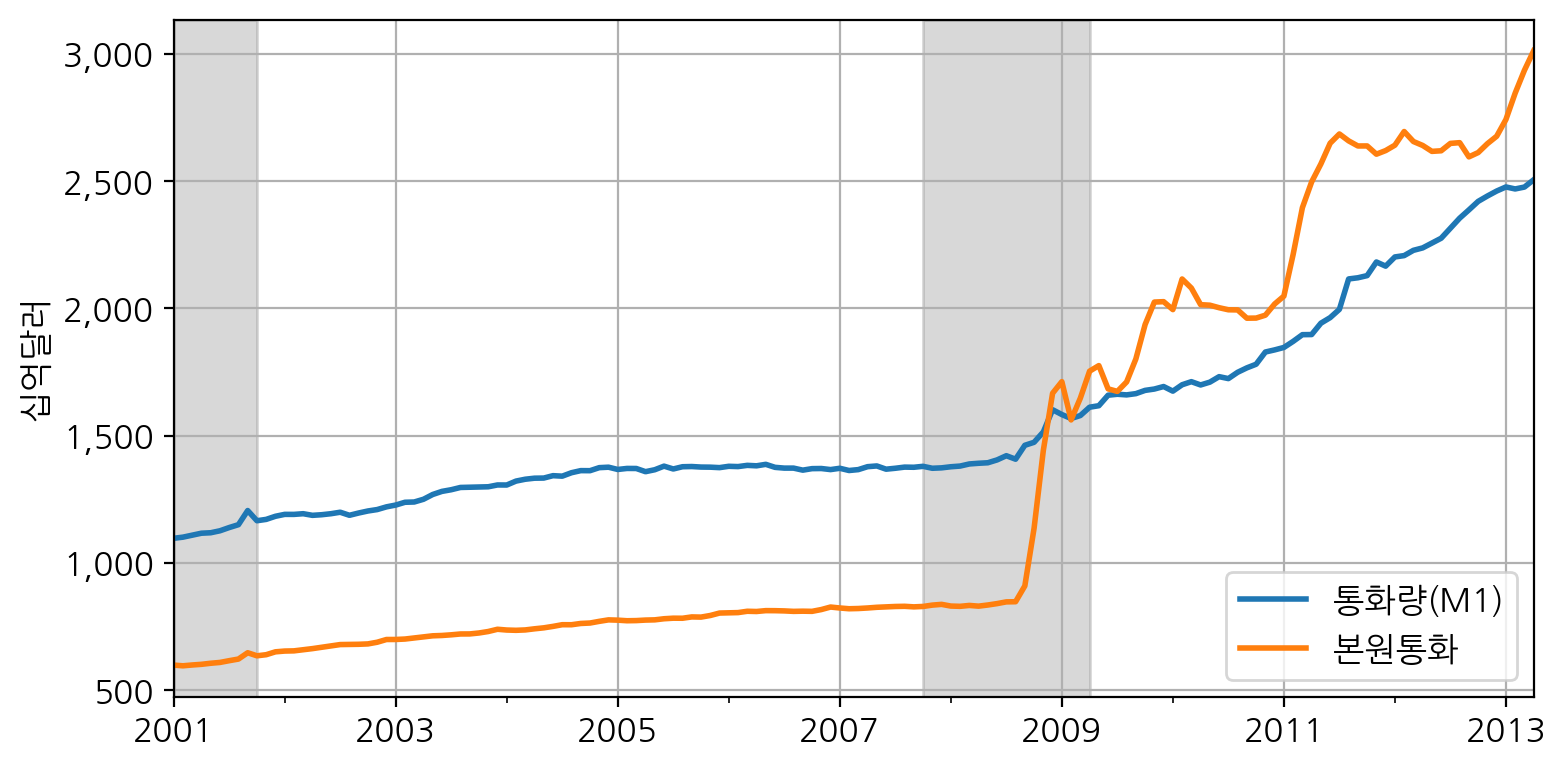

In [ ]:
# GFC 당시 통화량(M1)과 본원통화

ax = df_gfc.loc['2001':'2013-4',['M1SL','BOGMBASE',]].plot(figsize=(8, 4))
plt.legend(labels=['통화량(M1)','본원통화'], fontsize=12, loc='best')
plt.xlabel('')
plt.ylabel('십억달러')

plot_nber_recession(2001, 2013, NBERq, freq='quarterly')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()

save_fig('M1_base_GFC')
plt.show()

Saving figure M1_M2


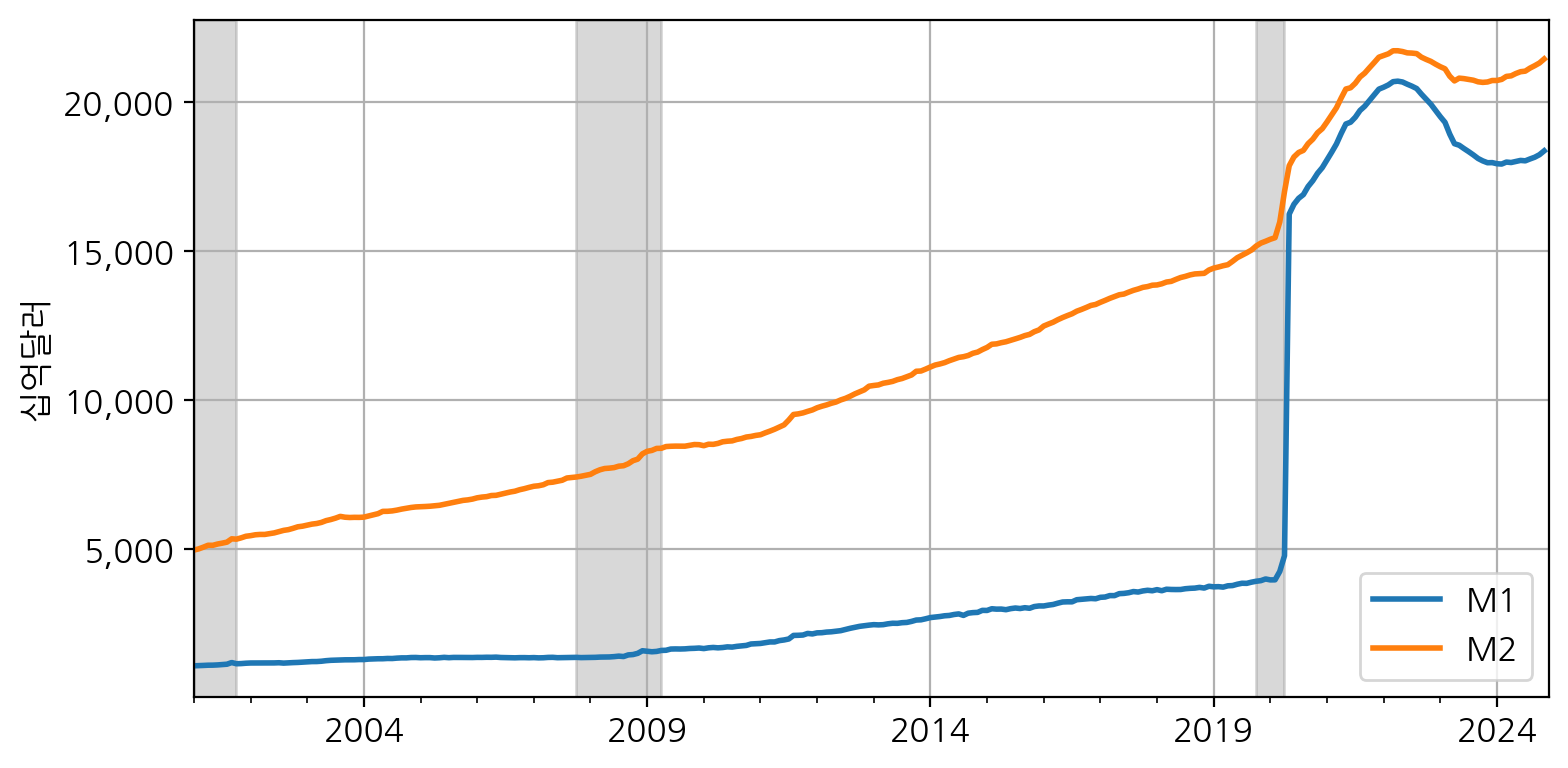

In [ ]:
# 코비드19 당시 M1, M2

ax = df_gfc.loc['2001':'2024',['M1SL','M2SL',]].plot(figsize=(8, 4))
plt.legend(labels=['M1','M2'], fontsize=12, loc='best')
plt.xlabel('')
plt.ylabel('십억달러')

plot_nber_recession(2001, 2024, NBERq, freq='quarterly')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()

save_fig('M1_M2')
plt.show()

## 화폐 유통속도(M1, M2)

In [ ]:
var_list = ['M1V','M2V']
start = date(1960,1,1)
end = date(2024,12,1)

df_velocity = pdr.get_data_fred(var_list, start=start, end=end)
print(df_velocity.head())

             M1V   M2V
DATE                  
1960-01-01 3.879 1.817
1960-04-01 3.876 1.797
1960-07-01 3.872 1.780
1960-10-01 3.836 1.737
1961-01-01 3.851 1.723


In [ ]:
df_velocity.describe()

,M1V,M2V
count,259.000,259.000
mean,6.434,1.764
std,2.121,0.230
min,1.215,1.128
25%,5.226,1.687
50%,6.584,1.752
75%,7.525,1.905
max,10.703,2.192


Saving figure M1_M2_velocity


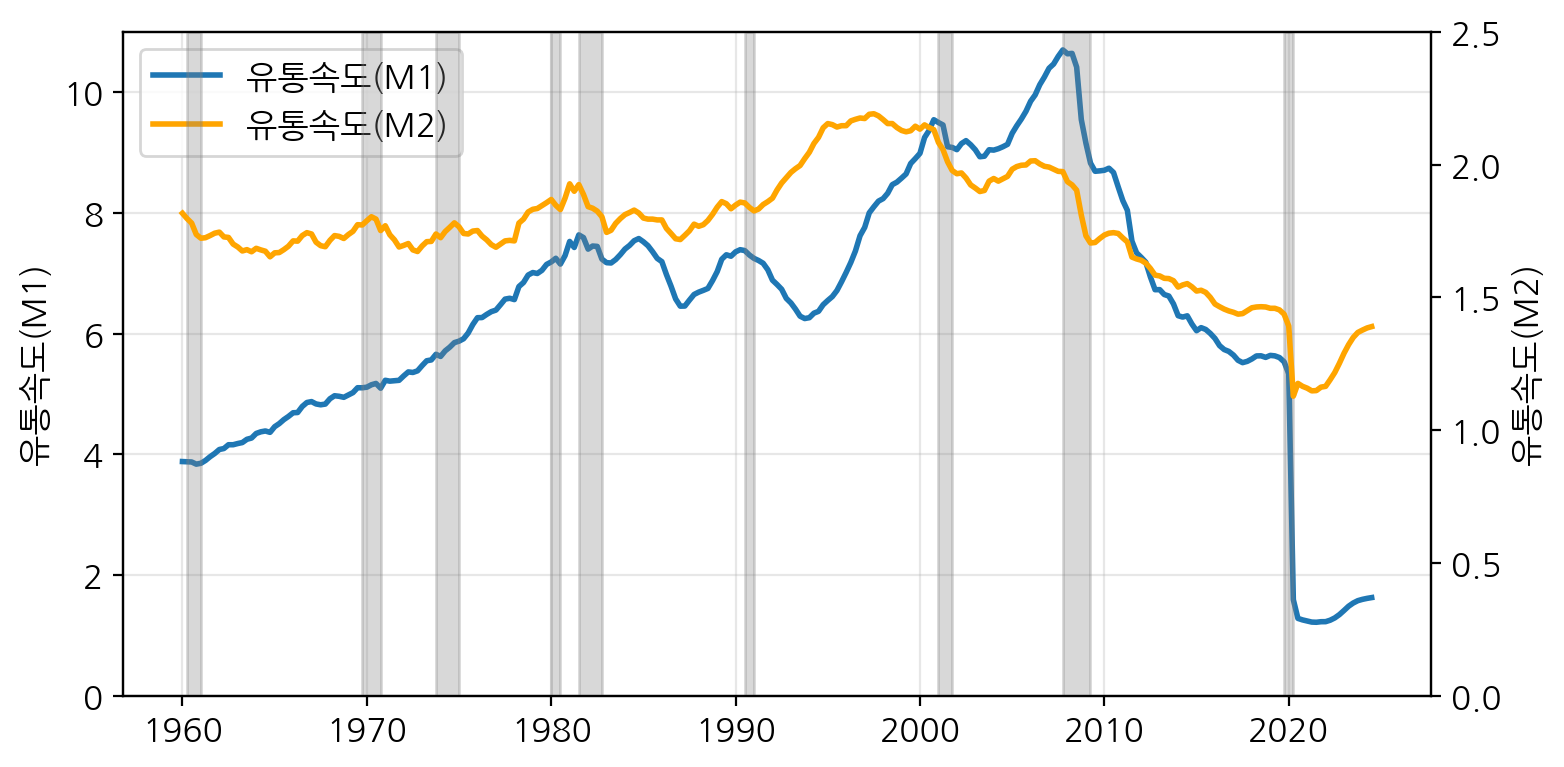

In [ ]:
# Create the figure and axis
plt.figure(figsize=(8, 4))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot M1 velocity on left axis
line1 = ax1.plot(df_velocity['M1V'], label='유통속도(M1)')
ax1.set_ylabel('유통속도(M1)')
ax1.tick_params(axis='y')
ax1.set_ylim(0, 11)
ax1.grid(True, alpha=0.3)

# Plot M2 velocity on right axis
line2 = ax2.plot(df_velocity['M2V'], label='유통속도(M2)', color='orange')
ax2.set_ylabel('유통속도(M2)')
ax2.tick_params(axis='y')
ax2.set_ylim(0, 2.5)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')


plot_nber_recession(1960, 2024, NBERq, freq='quarterly')

save_fig('M1_M2_velocity')
plt.show()

## 실질 M2 변화율과 경기변동

In [ ]:
var_list = ['M1REAL','M2REAL']
start = date(1960,1,1)
end = date(2024,12,1)

df_m2 = pdr.get_data_fred(var_list, start=start, end=end)
print(df_m2.head())

            M1REAL    M2REAL
DATE                        
1960-01-01 476.700 1,015.300
1960-02-01 475.700 1,014.600
1960-03-01 475.300 1,017.700
1960-04-01 472.600 1,015.900
1960-05-01 472.100 1,017.600


In [ ]:
# convert to quarterly date
df_quarterly = df_m2.resample('QE').mean()

# 전기 대비 증가율
df_quarterly['M2g'] = df_quarterly['M2REAL'].pct_change()*100

Saving figure realM2growth


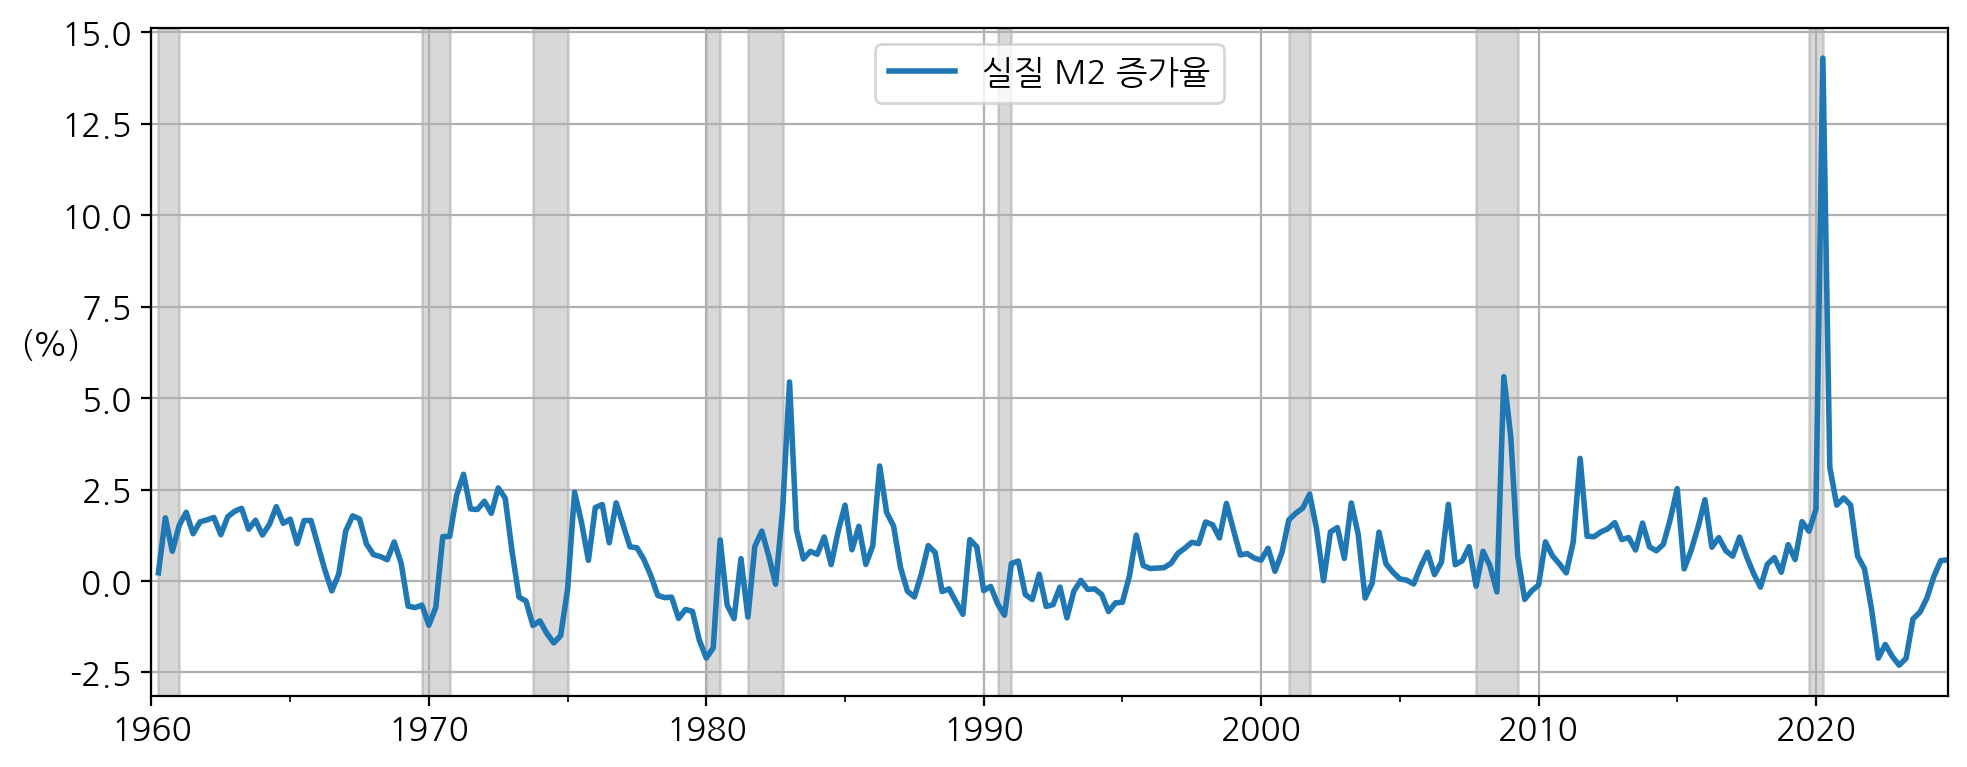

In [ ]:
df_quarterly.loc[:,'M2g'].plot(figsize=(10,4))
plt.legend(labels=['실질 M2 증가율'], loc='upper center')
plt.xlabel('')
plt.ylabel('(%)',rotation=0)
plot_nber_recession(1960, 2024, NBERq, freq='quarterly')
plt.grid()

save_fig('realM2growth')
plt.show()


In [ ]:
df_quarterly['M2g_yoy'] = df_quarterly['M2REAL'].pct_change(4)*100

<Axes: xlabel='DATE'>

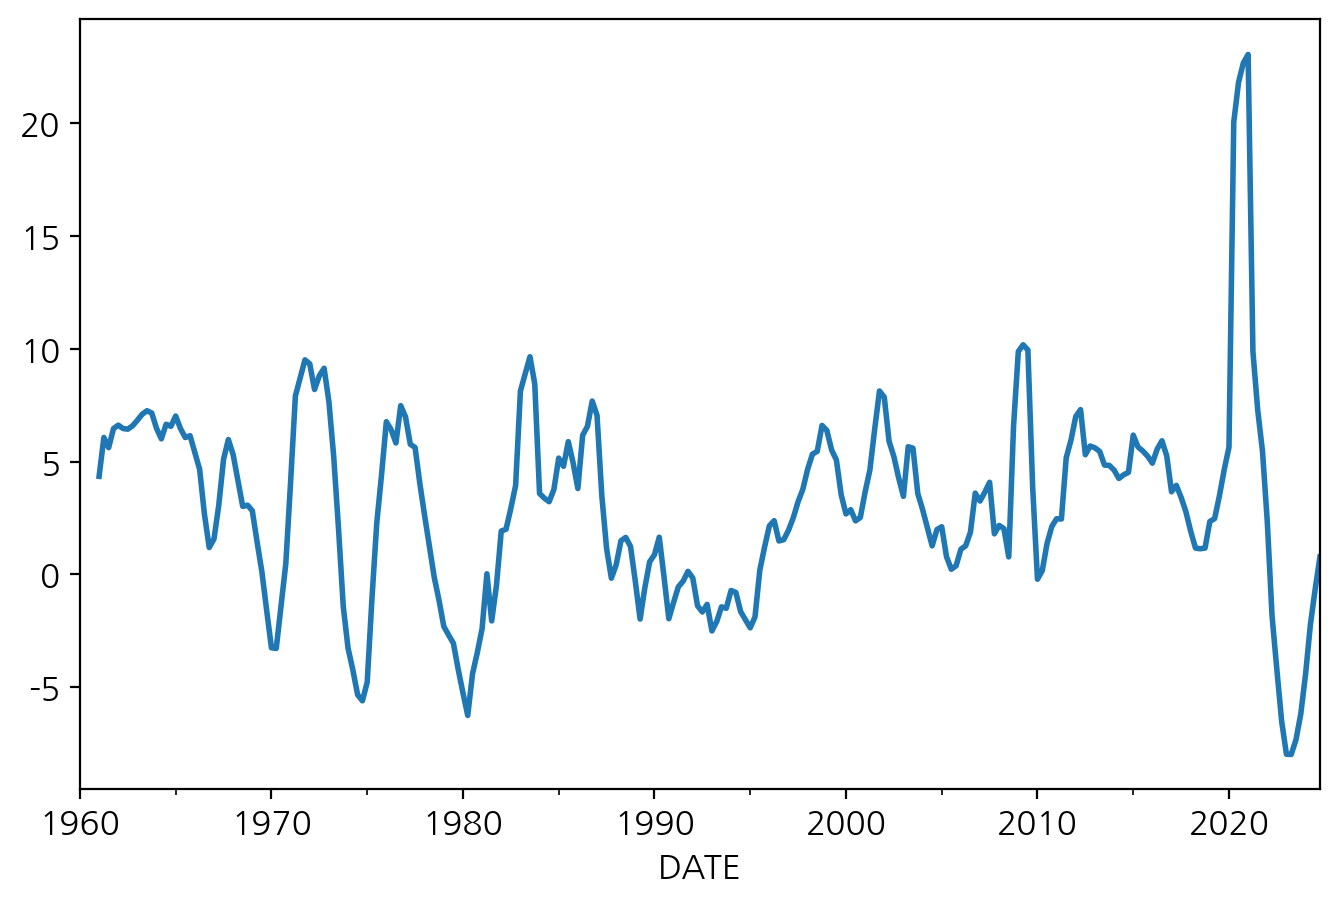

In [ ]:
df_quarterly['M2g_yoy'].plot()

## 재할인 대출

In [ ]:
var_list = ['DISCBORR']
start = date(2001,1,1)
end = date(2021,8,20)

df1 = pdr.get_data_fred(var_list, start=start, end=end)
print(df1.head())

            DISCBORR
DATE                
2001-01-01     0.073
2001-02-01     0.051
2001-03-01     0.058
2001-04-01     0.051
2001-05-01     0.213


Saving figure discountloan


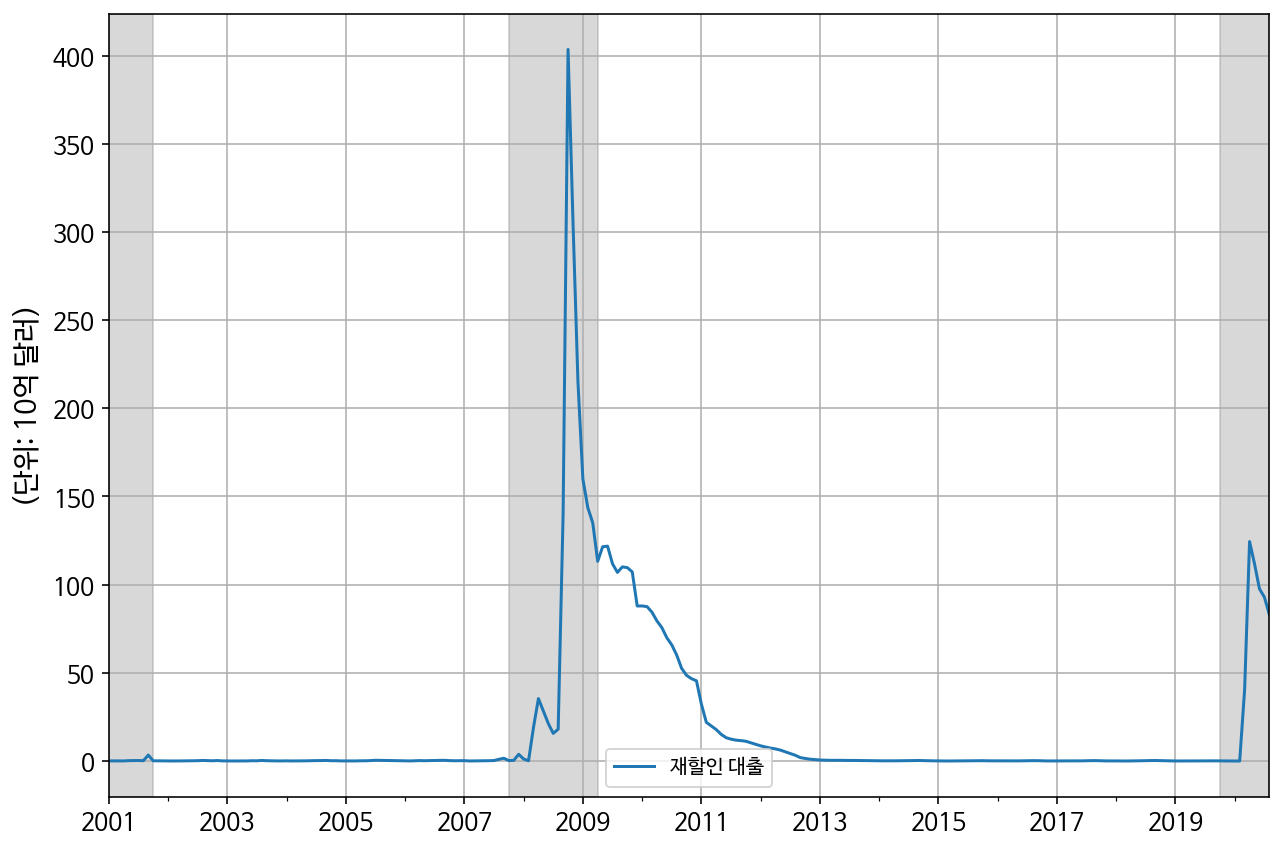

In [ ]:
df1.plot()
plt.legend(labels=['재할인 대출'])
plt.xlabel('')
plt.ylabel('(단위: 10억 달러)')
plotNBERrecession_quarterly(2001, 2020, NBERq)
plt.grid()

save_fig('discountloan')

## 목표 및 실효 연방기금금리, 재할인 대출 이자율

In [ ]:
var_list = ['DFEDTAR','FEDFUNDS','INTDSRUSM193N']
start = date(1982,1,1)
end = date(2008,12,15)

df3 = pdr.get_data_fred(var_list, start=start, end=end)
print(df3.tail())

            DFEDTAR  FEDFUNDS  INTDSRUSM193N
DATE                                        
2008-12-11      1.0       NaN            NaN
2008-12-12      1.0       NaN            NaN
2008-12-13      1.0       NaN            NaN
2008-12-14      1.0       NaN            NaN
2008-12-15      1.0       NaN            NaN


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9586 entries, 1982-01-01 to 2008-12-15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DFEDTAR        9577 non-null   float64
 1   FEDFUNDS       324 non-null    float64
 2   INTDSRUSM193N  324 non-null    float64
dtypes: float64(3)
memory usage: 299.6 KB


In [ ]:
df3 = df3.resample('M').mean()

Saving figure effective_target_ffr


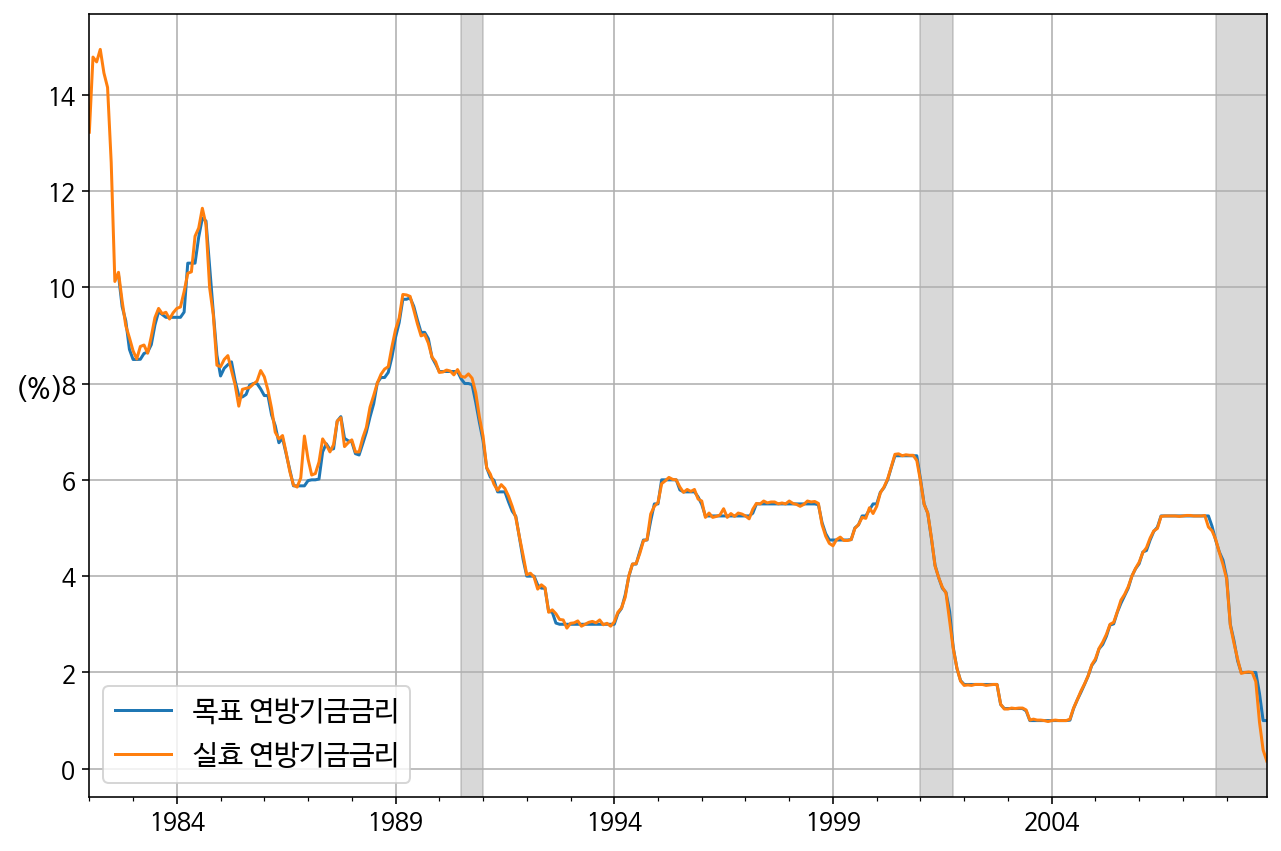

In [ ]:
df3[['DFEDTAR','FEDFUNDS']].plot()
plt.legend(labels=['목표 연방기금금리','실효 연방기금금리'], fontsize=14)
plt.xlabel('')
plt.ylabel('(%)',rotation=0)
plotNBERrecession_quarterly(1984, 2020, NBERq)

plt.grid()
save_fig('effective_target_ffr')

plt.show()

Saving figure target_ffr_discount


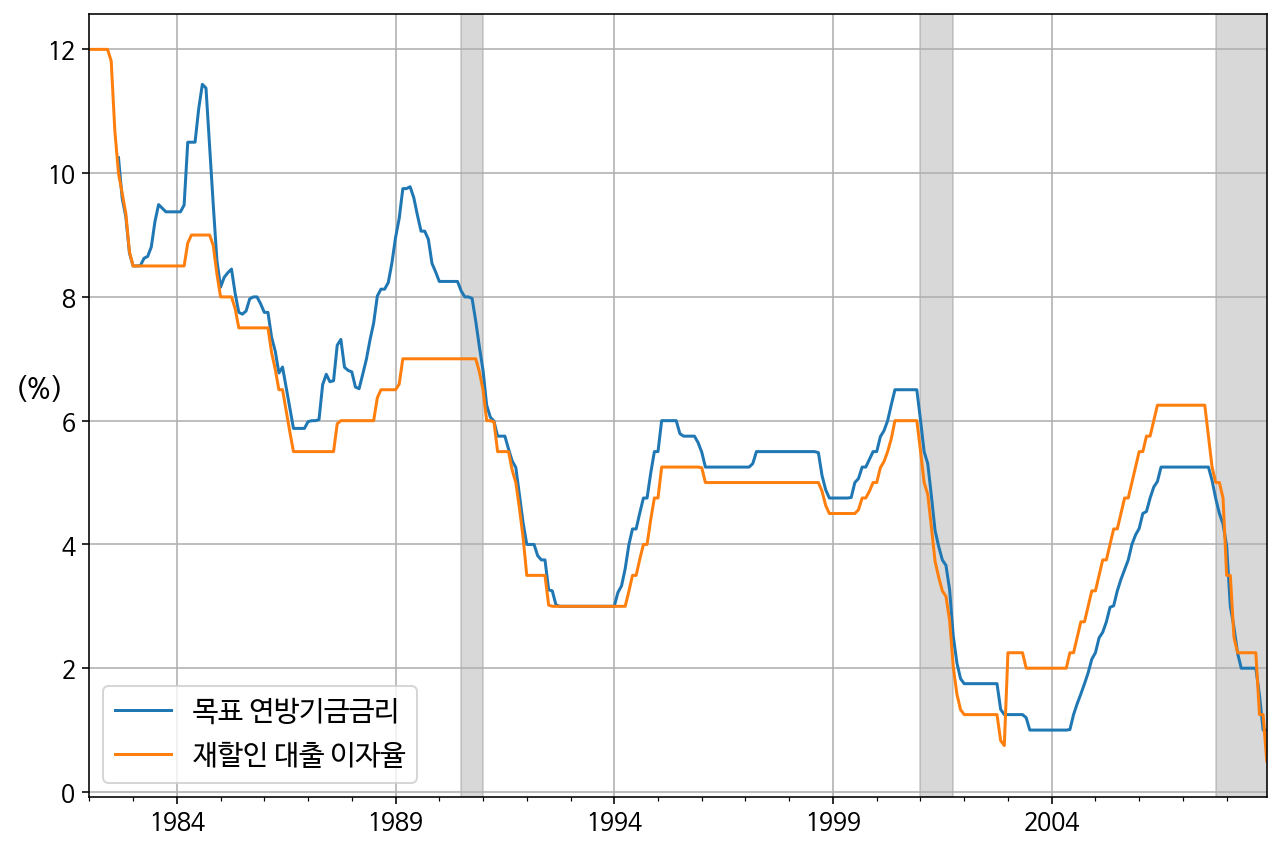

In [ ]:
df3[['DFEDTAR','INTDSRUSM193N']].plot()
plt.legend(labels=['목표 연방기금금리','재할인 대출 이자율'], fontsize=14)
plt.xlabel('')
plt.ylabel('(%)',rotation=0)
plotNBERrecession_quarterly(1984, 2020, NBERq)

plt.grid()
save_fig('target_ffr_discount')

plt.show()

## 10년 장기금리, 연방기금금리

In [ ]:
var_list = ['FEDFUNDS','GS10']
start = date(2001,1,1)
end = date(2020,5,20)

df4 = pdr.get_data_fred(var_list, start=start, end=end)
print(df4.head())

            EXCSRESNW  WALCL
DATE                        
2001-01-03      1.498    NaN
2001-01-10      1.498    NaN
2001-01-17      1.131    NaN
2001-01-24      1.131    NaN
2001-01-31      1.194    NaN


Saving figure ffr_10year


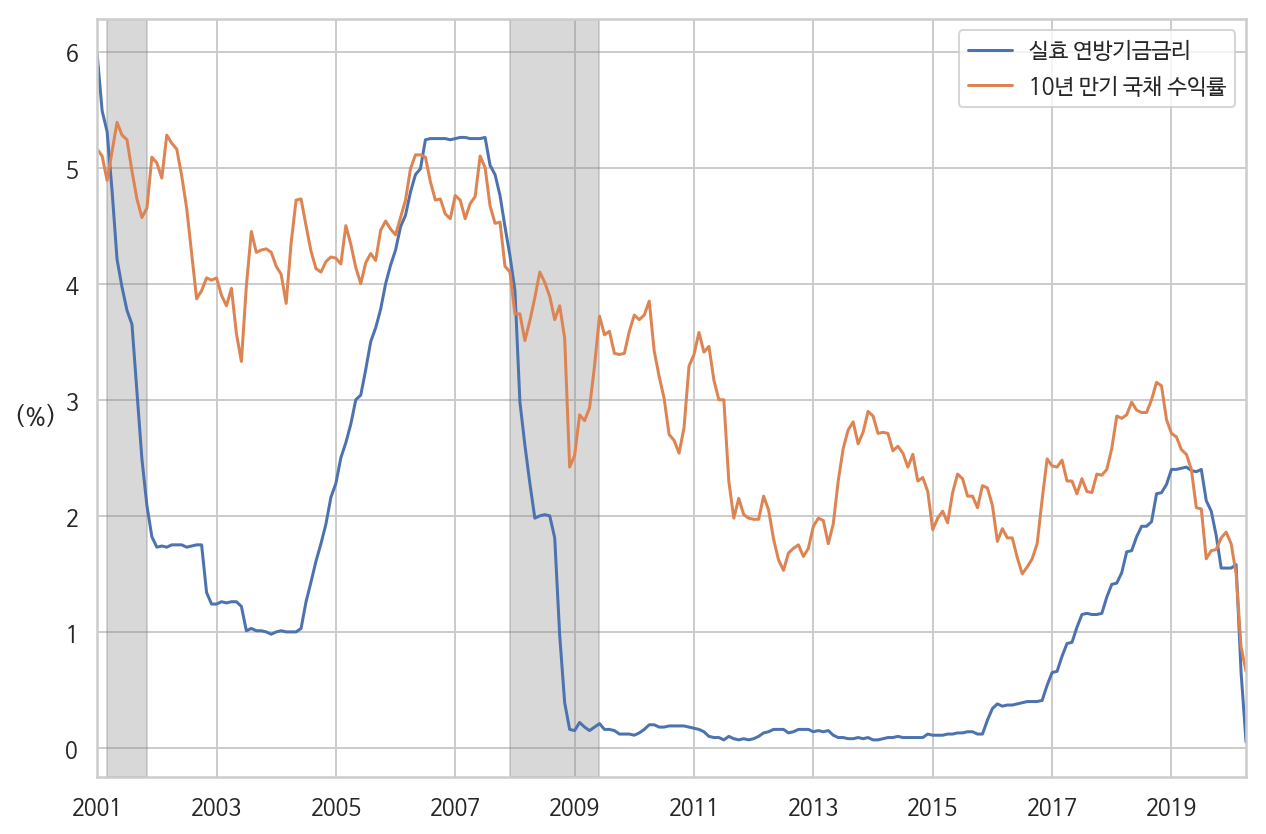

In [ ]:
df4.plot()
plt.legend(labels=['실효 연방기금금리','10년 만기 국채 수익률'])
plt.xlabel('')
plt.ylabel('        (%)',rotation=180)
plotNBERrecession_quarterly(1984, 2020, NBERq)

save_fig('ffr_10year')

## MMMF

In [ ]:
var_list = ['MMMFFAQ027S']
start = date(1977,1,1)
end = date(2020,5,20)

df5 = pdr.get_data_fred(var_list, start=start, end=end)
print(df5.head())

            MMMFFAQ027S
DATE                   
1977-01-01       3460.0
1977-04-01       3443.0
1977-07-01       3463.0
1977-10-01       3887.0
1978-01-01       5620.0


Saving figure MMMF


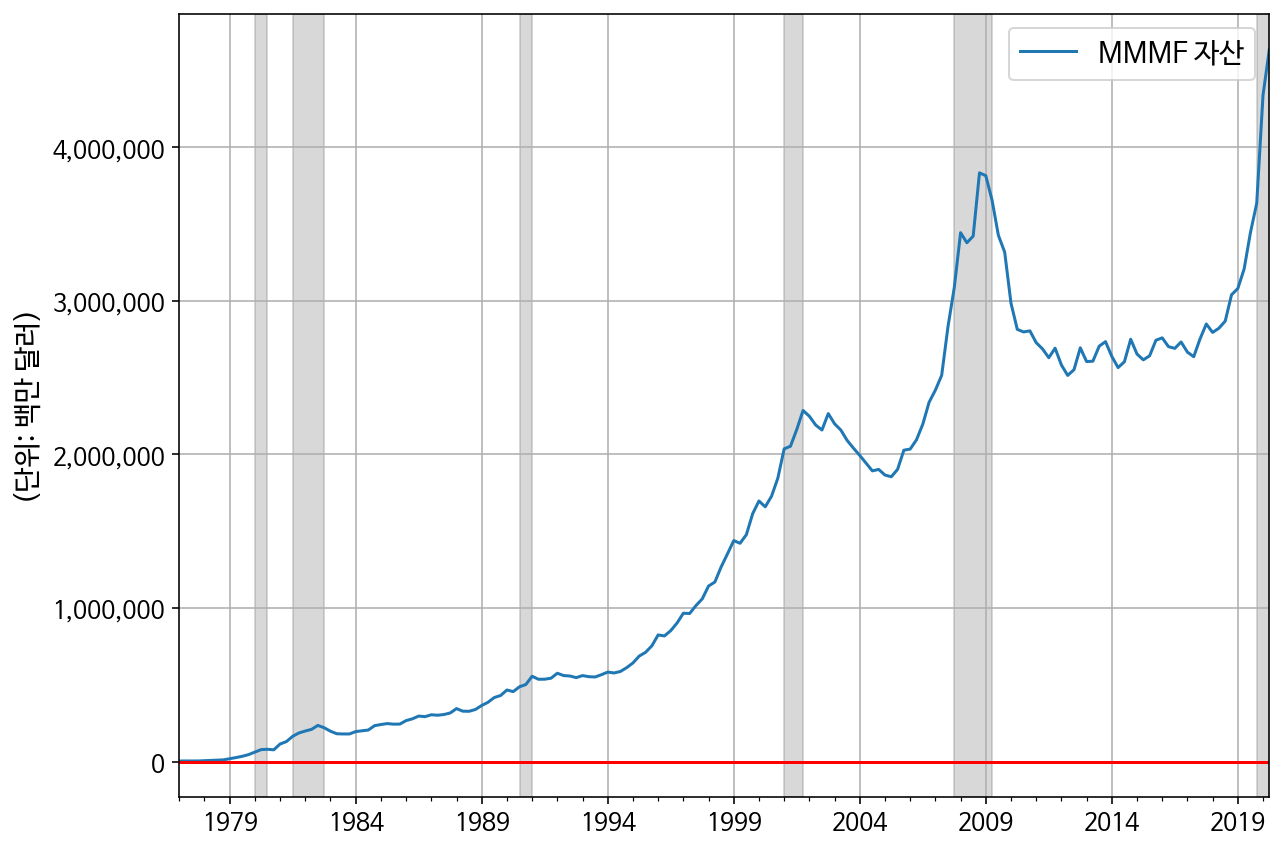

In [ ]:
ax = df5.plot()
plt.legend(labels=['MMMF 자산'], fontsize=14)
plt.xlabel('')
plt.ylabel('(단위: 백만 달러)')
plt.axhline(0,color='red')
plotNBERrecession_quarterly(1977, 2020, NBERq)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid()
save_fig('MMMF')

## Housing Prices

In [ ]:
var_list = ['CSUSHPISA','NYXRSA','SFXRSA']
start = date(2001,1,1)
end = date(2021,8,20)

df6 = pdr.get_data_fred(var_list, start=start, end=end)
print(df6.head())

            CSUSHPISA      NYXRSA      SFXRSA
DATE                                         
2001-01-01    109.846  112.936259  133.040245
2001-02-01    110.501  114.251953  135.075262
2001-03-01    111.108  115.314224  134.936975
2001-04-01    111.650  116.364966  133.855792
2001-05-01    112.162  116.978208  132.662008


In [ ]:
df6 = 100*df6/df6.iloc[0,:]

Saving figure housing_price


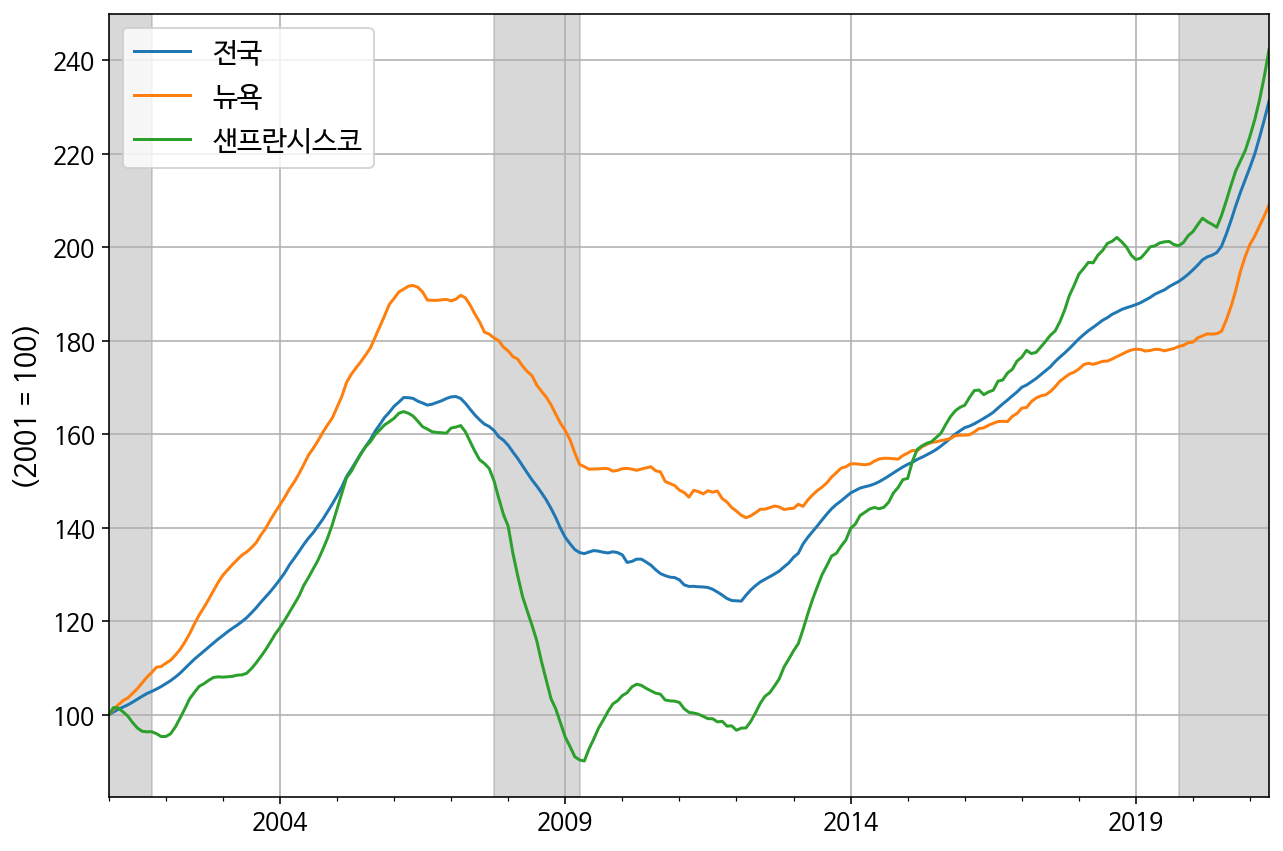

In [ ]:
ax = df6.plot()
plt.legend(labels=['전국','뉴욕','샌프란시스코'], fontsize=14)
plt.xlabel('')
plt.ylabel('(2001 = 100)')
#plt.axhline(100,color='red')
plotNBERrecession_quarterly(2000, 2020, NBERq)
plt.grid()

save_fig('housing_price')

## Economic Policy Uncertainty, VIX

In [ ]:
var_list = ['USEPUINDXD', 'VIXCLS']
start = date(2001,1,1)
end = date(2021,8,20)

df7 = pdr.get_data_fred(var_list, start=start, end=end)
print(df7.head())

            USEPUINDXD  VIXCLS
DATE                          
2001-01-01      226.65     NaN
2001-01-02      231.58   29.99
2001-01-03       36.08   26.60
2001-01-04      159.18   26.97
2001-01-05       85.79   28.67


In [ ]:
df7 = df7.resample('m').mean()

Saving figure EPU


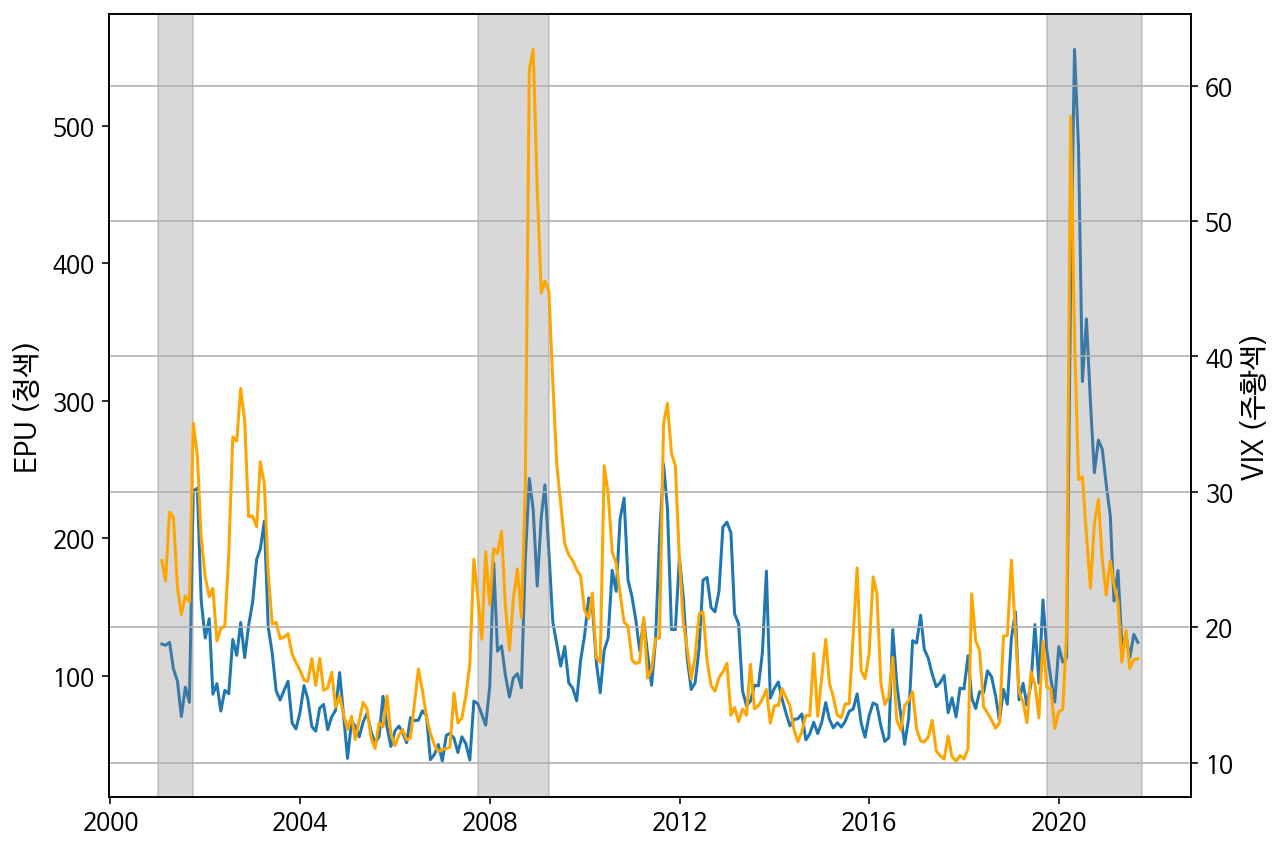

In [ ]:
fig, ax = plt.subplots()
ax.plot(df7.index,df7['USEPUINDXD'])
ax.set_ylabel('EPU (청색)')

ax1 = ax.twinx()
ax1.plot(df7.index,df7['VIXCLS'],color='orange')
ax1.set_ylabel('VIX (주황색)')
ax1.grid()

plotNBERrecession_quarterly(2000, 2020, NBERq)

save_fig('EPU')

## Unemployment Rate, Number of Claims

In [ ]:
var_list = ['UNRATE', 'CCSA']
start = date(2001,1,1)
end = date(2021,8,20)

df8 = pdr.get_data_fred(var_list, start=start, end=end)
print(df8.head())

            UNRATE       CCSA
DATE                         
2001-01-01     4.2        NaN
2001-01-06     NaN  2357000.0
2001-01-13     NaN  2367000.0
2001-01-20     NaN  2419000.0
2001-01-27     NaN  2440000.0


In [ ]:
df8 = df8.resample('M').mean()

In [ ]:
df8['CCSA'] = df8['CCSA'].div(1000000)

Saving figure unemployment


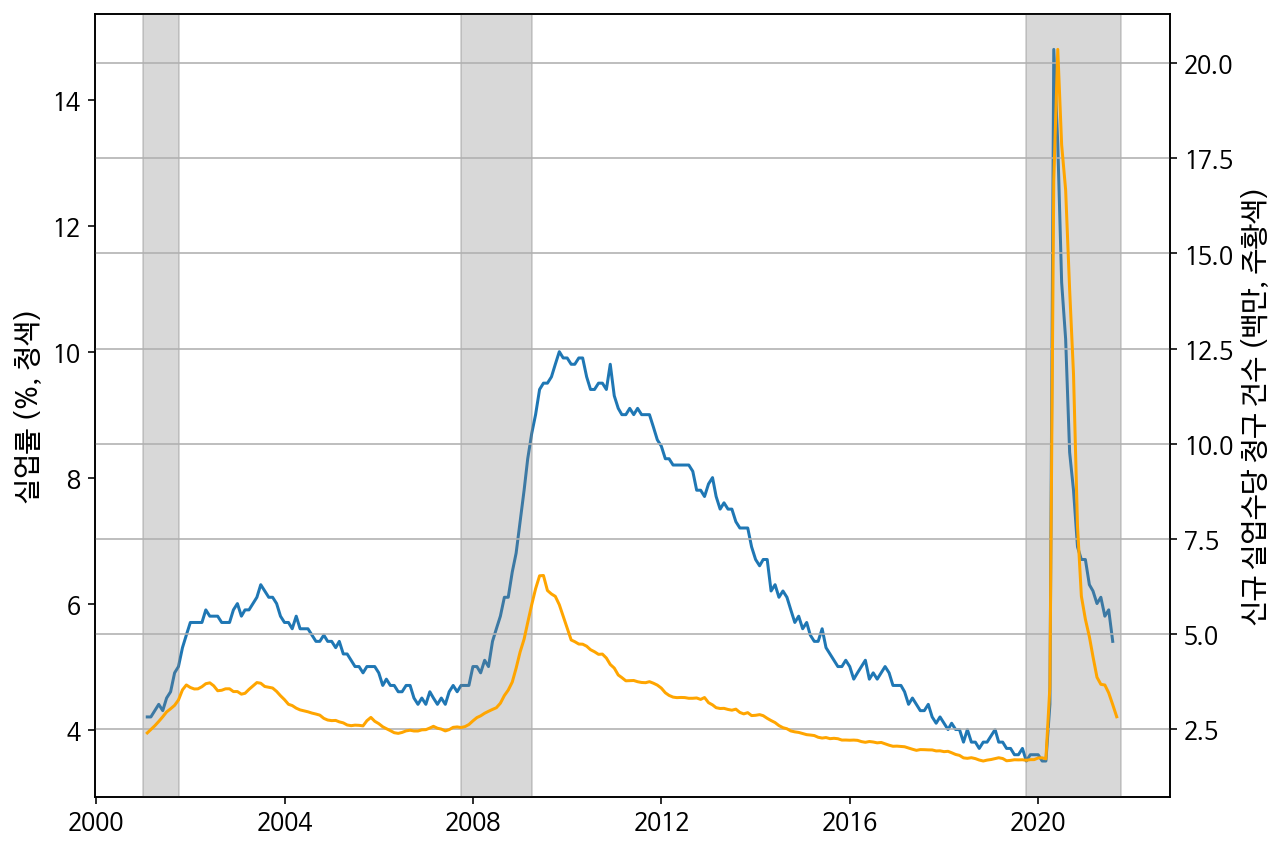

In [ ]:
fig, ax = plt.subplots()
ax.plot(df8.index,df8['UNRATE'])
ax.set_ylabel('실업률 (%, 청색)')


ax1 = ax.twinx()
ax1.plot(df8.index,df8['CCSA'],color='orange')
ax1.set_ylabel('신규 실업수당 청구 건수 (백만, 주황색)')
ax1.grid()


plotNBERrecession_quarterly(2000, 2020, NBERq)

save_fig('unemployment')

## 일본 주가지수, 환율

In [ ]:
var_list = ['NIKKEI225', 'DEXJPUS','LRHUTTTTJPM156S']
start = date(1985,1,1)
end = date(2021,8,20)

df = pdr.get_data_fred(var_list, start=start, end=end)
print(df.head())

            NIKKEI225  DEXJPUS  LRHUTTTTJPM156S
DATE                                           
1985-01-01        NaN      NaN              2.5
1985-01-02   11542.60   251.80              NaN
1985-01-03   11542.60   252.45              NaN
1985-01-04   11558.06   253.20              NaN
1985-01-07   11575.50   255.95              NaN


In [ ]:
unrate_JPN = df['LRHUTTTTJPM156S']
df = df[['NIKKEI225', 'DEXJPUS']].resample('w').mean()

Saving figure japan_nikkei_yen


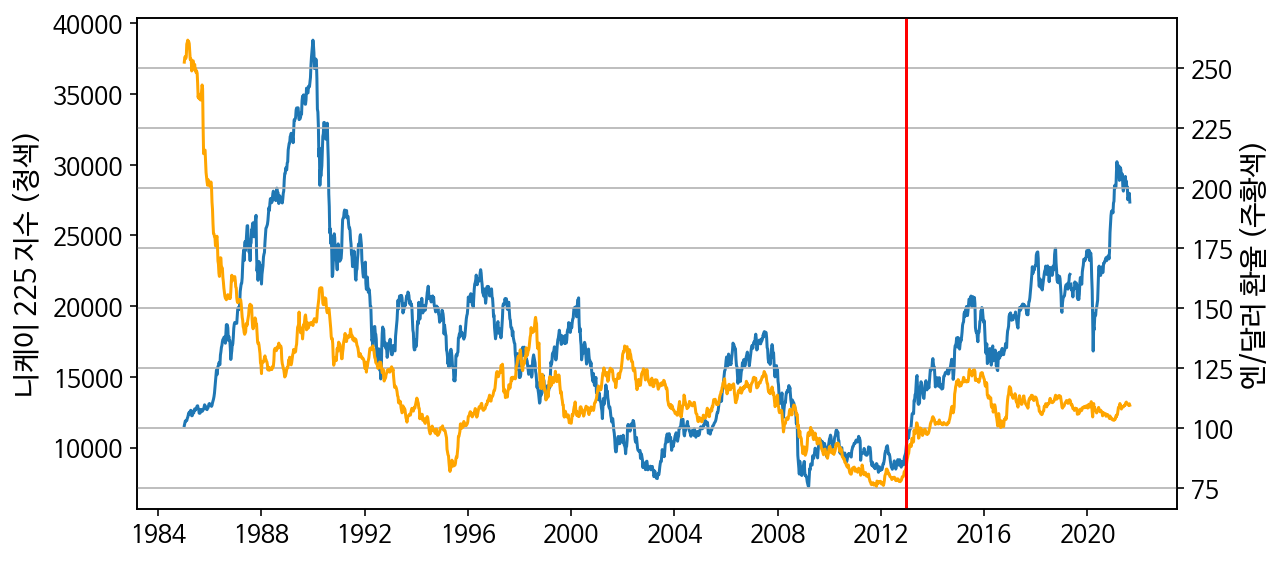

In [ ]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(df.index,df['NIKKEI225'])
ax.set_ylabel('니케이 225 지수 (청색)')


ax1 = ax.twinx()
ax1.plot(df.index,df['DEXJPUS'],color='orange')
ax1.set_ylabel('엔/달러 환율 (주황색)')
ax1.grid()

plt.axvline(dt.datetime(2012,12,23),color='red')

save_fig('japan_nikkei_yen')

In [ ]:
unrate_JPN = unrate_JPN.resample('m').mean()
nikkei = df['NIKKEI225'].resample('m').mean()

Saving figure japan_nikkei_unrate


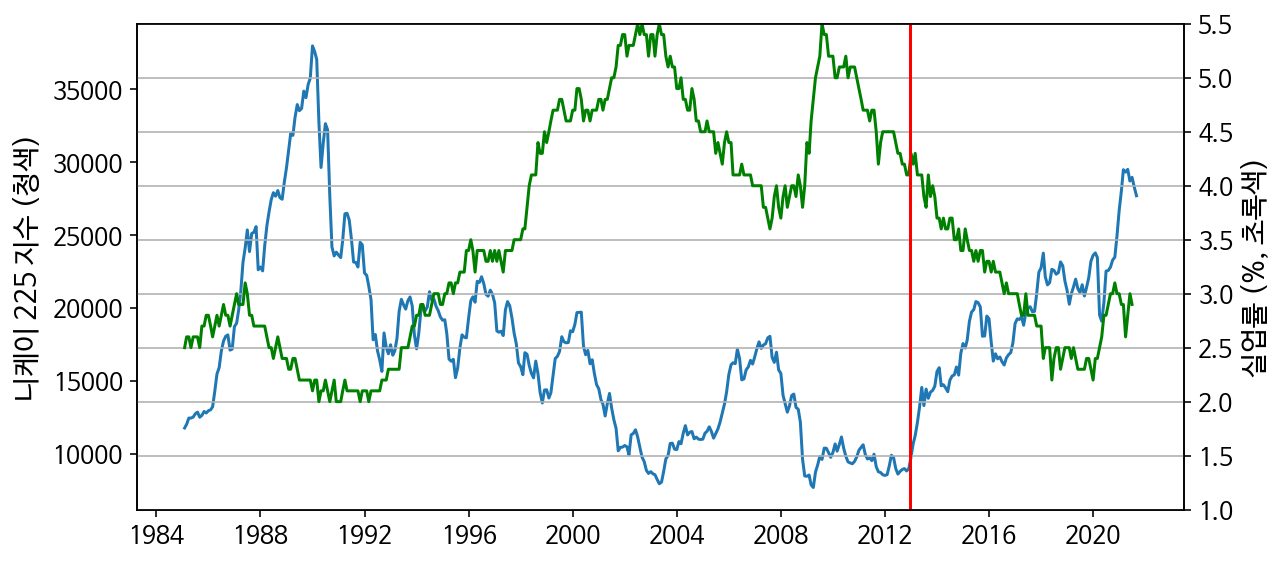

In [ ]:
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(nikkei.index,nikkei)
ax.set_ylabel('니케이 225 지수 (청색)')


ax1 = ax.twinx()
ax1.plot(unrate_JPN.index,unrate_JPN,color='green')
ax1.set_ylabel('실업률 (%, 초록색)')
ax1.grid()
ax1.set_ylim([1,5.5])

plt.axvline(dt.datetime(2012,12,23),color='red')

save_fig('japan_nikkei_unrate')

In [ ]:
unrate_JPN

DATE
1985-01-31    2.5
1985-02-28    2.6
1985-03-31    2.6
1985-04-30    2.5
1985-05-31    2.6
             ... 
2020-01-31    2.4
2020-02-29    2.4
2020-03-31    2.5
2020-04-30    NaN
2020-05-31    NaN
Freq: M, Name: LRHUTTTTJPM156S, Length: 425, dtype: float64

In [ ]:
nikkei

DATE
1985-01-31    11755.270333
1985-02-28    12004.980500
1985-03-31    12433.671600
1985-04-30    12434.111000
1985-05-31    12499.578000
                  ...     
2020-01-31    23767.804750
2020-02-29    23450.548875
2020-03-31    19497.153000
2020-04-30    19081.467000
2020-05-31    20087.880958
Freq: M, Name: NIKKEI225, Length: 425, dtype: float64